In [78]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [79]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
# from keras.layers.advanced_activations import LeakyReLU

In [80]:
dirname = os.path.join(os.getcwd(), 'images/per/')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("leyendo imagenes de ", imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant = cant + 1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print(b, end="\r")
            if prevRoot != root:
                print(root, cant)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0
dircount.append(cant)

dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leidos:', len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:', sum(dircount))

print(dircount)

leyendo imagenes de  C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\# 1
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\$ 5103
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\% 5103
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\& 5103
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\1 4914
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\2 5670
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\3 5670
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\4 5670
C:\Proyects\IA\IA\ia\Practicas\dataset\images/per/\5 5670
Directorios leidos: 9
Imagenes en cada directorio [5104, 5103, 5103, 4914, 5670, 5670, 5670, 5670, 5669]
suma Total de imagenes en subdirs: 48573
[5104, 5103, 5103, 4914, 5670, 5670, 5670, 5670, 5669]


In [81]:
labels = []
indice = 0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice = indice + 1
print("Cantidad etiquetas creadas: ", len(labels))


Cantidad etiquetas creadas:  48573


In [82]:
deportes = []
indice = 0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice, name[len(name) - 1])
    deportes.append(name[len(name) - 1])
    indice = indice + 1

0 #
1 $
2 %
3 &
4 1
5 2
6 3
7 4
8 5


In [83]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)  #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  9
Output classes :  [0 1 2 3 4 5 6 7 8]


In [84]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (38858, 32, 32) (38858,)
Testing data shape :  (9715, 32, 32) (9715,)


Text(0.5, 1.0, 'Ground Truth : 2')

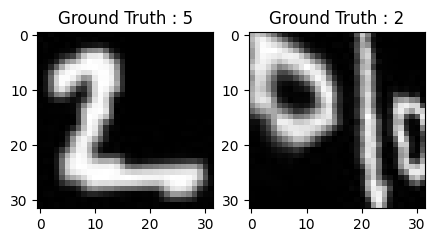

In [85]:
plt.figure(figsize=[5, 5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

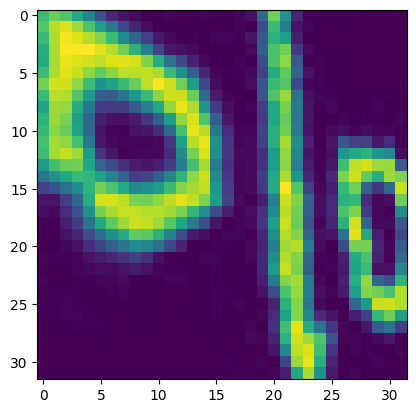

In [86]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
plt.imshow(test_X[0, :, :])

In [87]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [88]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [89]:
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

(31086, 32, 32) (7772, 32, 32) (31086, 9) (7772, 9)


In [90]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3  # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 60  # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64  # cantidad de imágenes que se toman a la vez en memoria

In [91]:
from keras.layers import LeakyReLU

sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(32, 32, 1)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))

sport_model.add(Dense(nClasses, activation='softmax'))

In [92]:
sport_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                262176    
                                                      

In [93]:
sport_model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),
                    metrics=['accuracy'])

In [94]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1,
                              validation_data=(valid_X, valid_label))

Epoch 1/60
486/486 [==============================] - 10s 21ms/step - loss: 2.0786 - accuracy: 0.2182 - val_loss: 1.8526 - val_accuracy: 0.4550
Epoch 2/60
486/486 [==============================] - 14s 29ms/step - loss: 1.8090 - accuracy: 0.3565 - val_loss: 1.5522 - val_accuracy: 0.5558
Epoch 3/60
486/486 [==============================] - 14s 28ms/step - loss: 1.6378 - accuracy: 0.4206 - val_loss: 1.3789 - val_accuracy: 0.6238
Epoch 4/60
486/486 [==============================] - 17s 35ms/step - loss: 1.5306 - accuracy: 0.4581 - val_loss: 1.2600 - val_accuracy: 0.6522
Epoch 5/60
486/486 [==============================] - 17s 35ms/step - loss: 1.4513 - accuracy: 0.4827 - val_loss: 1.1827 - val_accuracy: 0.6656
Epoch 6/60
486/486 [==============================] - 14s 29ms/step - loss: 1.3985 - accuracy: 0.5038 - val_loss: 1.1168 - val_accuracy: 0.6791
Epoch 7/60
486/486 [==============================] - 11s 23ms/step - loss: 1.3496 - accuracy: 0.5214 - val_loss: 1.0671 - val_accuracy:

In [95]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("celulas.h5py")

INFO:tensorflow:Assets written to: celulas.h5py\assets


INFO:tensorflow:Assets written to: celulas.h5py\assets


In [96]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

304/304 [==============================] - 3s 8ms/step - loss: 0.6312 - accuracy: 0.8000


In [97]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6311813592910767
Test accuracy: 0.800000011920929


In [98]:
sport_train.history

{'loss': [2.078579902648926,
  1.8089909553527832,
  1.6377657651901245,
  1.5305750370025635,
  1.4513392448425293,
  1.398540735244751,
  1.349566102027893,
  1.3099559545516968,
  1.2760947942733765,
  1.2545040845870972,
  1.2319000959396362,
  1.2088791131973267,
  1.1971105337142944,
  1.1781152486801147,
  1.1583489179611206,
  1.1475260257720947,
  1.1348423957824707,
  1.1321970224380493,
  1.1122103929519653,
  1.100602626800537,
  1.088376760482788,
  1.0855869054794312,
  1.0851094722747803,
  1.0716372728347778,
  1.0655083656311035,
  1.0588525533676147,
  1.0460370779037476,
  1.0451127290725708,
  1.042763113975525,
  1.0367680788040161,
  1.0293110609054565,
  1.029805064201355,
  1.0239713191986084,
  1.0118759870529175,
  1.0068532228469849,
  1.0063660144805908,
  0.9913969039916992,
  1.0042946338653564,
  0.9935175776481628,
  0.9903943538665771,
  0.9841488599777222,
  0.9833036065101624,
  0.9805048704147339,
  0.9749004244804382,
  0.9780080914497375,
  0.96726

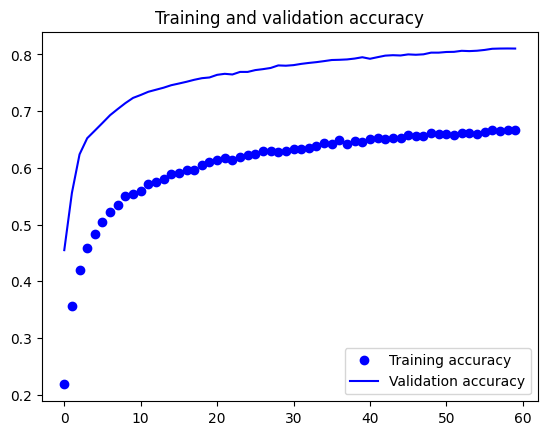

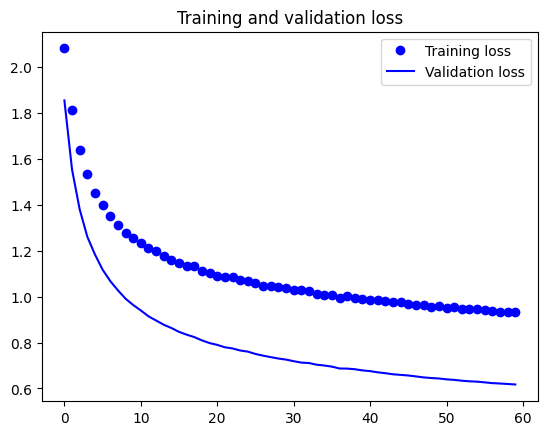

In [99]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [100]:
predicted_classes2 = sport_model.predict(test_X)

304/304 [==============================] - 3s 9ms/step


In [101]:
predicted_classes = []
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes = np.array(predicted_classes)

In [102]:
predicted_classes.shape, test_Y.shape

((9715,), (9715,))

Found 7772 correct labels


C:\Users\rosma\AppData\Local\Temp\ipykernel_14688\362292364.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


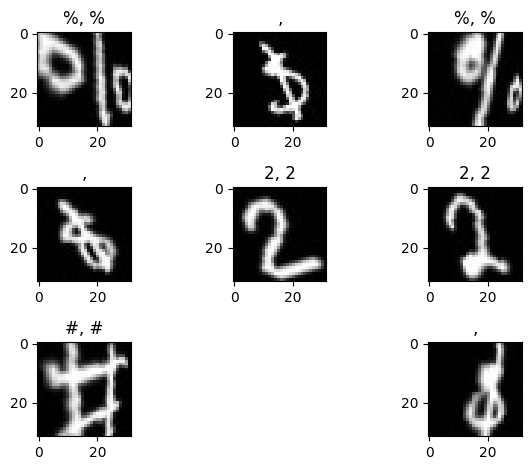

In [103]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(32,32,1), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                              deportes[test_Y[correct]]))

    plt.tight_layout()

Found 1943 incorrect labels


C:\Users\rosma\AppData\Local\Temp\ipykernel_14688\85077234.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


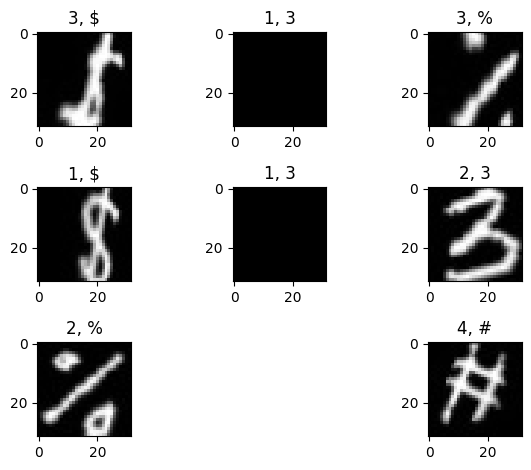

In [104]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[incorrect].reshape(32, 32, 1), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                              deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [105]:
target_names = ["Class {}".format(deportes[i]) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class #       0.85      0.90      0.88      1006
     Class $       0.85      0.70      0.77      1038
     Class %       0.87      0.79      0.83      1038
     Class &       0.80      0.79      0.80       970
     Class 1       0.63      0.89      0.74      1141
     Class 2       0.87      0.74      0.80      1155
     Class 3       0.78      0.83      0.80      1145
     Class 4       0.79      0.80      0.80      1106
     Class 5       0.85      0.78      0.81      1116

    accuracy                           0.80      9715
   macro avg       0.81      0.80      0.80      9715
weighted avg       0.81      0.80      0.80      9715

